https://www.datacamp.com/community/tutorials/social-network-analysis-python#comments

Files:

nodeId.edges : The edges in the ego network for the node 'nodeId'. Edges are undirected for facebook, and directed (a follows b) for twitter and gplus. The 'ego' node does not appear, but it is assumed that they follow every node id that appears in this file.

nodeId.circles : The set of circles for the ego node. Each line contains one circle, consisting of a series of node ids. The first entry in each line is the name of the circle.

nodeId.feat : The features for each of the nodes that appears in the edge file.

nodeId.egofeat : The features for the ego user.

nodeId.featnames : The names of each of the feature dimensions. Features are '1' if the user has this property in their profile, and '0' otherwise. This file has been anonymized for facebook users, since the names of the features would reveal private data.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')


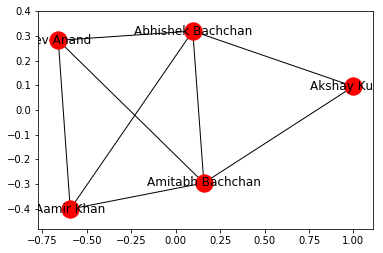

In [6]:
nx.spring_layout(G_symmetric) 
nx.draw_networkx(G_symmetric)


In [10]:
nx.degree(G_symmetric, 'Dev Anand')

3

In [11]:
nx.average_clustering(G_symmetric)

0.8666666666666666

In [12]:
nx.shortest_path(G_symmetric, 'Dev Anand', 'Akshay Kumar')

['Dev Anand', 'Amitabh Bachchan', 'Akshay Kumar']

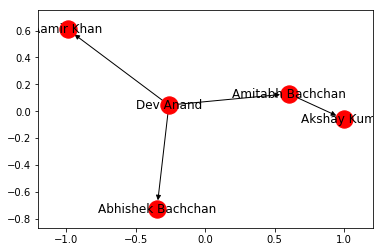

In [14]:
T = nx.bfs_tree(G_symmetric, 'Dev Anand')

nx.spring_layout(T) 
nx.draw_networkx(T)

In [4]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

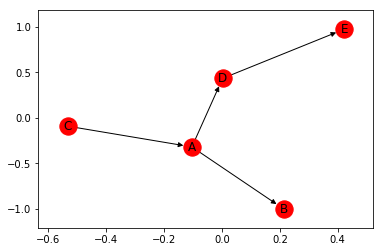

In [5]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)


In [7]:
G_weighted = nx.Graph()
G_weighted.add_edge('Amitabh Bachchan','Abhishek Bachchan', weight=25)
G_weighted.add_edge('Amitabh Bachchan','Aaamir Khan', weight=8)
G_weighted.add_edge('Amitabh Bachchan','Akshay Kumar', weight=11)
G_weighted.add_edge('Amitabh Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Abhishek Bachchan','Aaamir Khan', weight=4)
G_weighted.add_edge('Abhishek Bachchan','Akshay Kumar',weight=7)
G_weighted.add_edge('Abhishek Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Dev Anand','Aaamir Khan',weight=1)


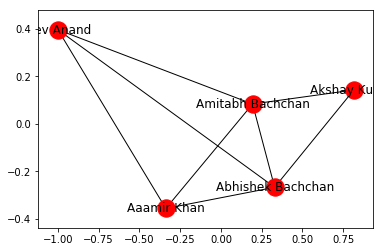

In [8]:
nx.spring_layout(G_weighted)
nx.draw_networkx(G_weighted)

In [2]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [3]:
print(nx.info(G_fb))

nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True) 

print (sorted(betCent, key=betCent.get, reverse=True)[:5])

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910
[107, 1684, 3437, 1912, 1085]


In [4]:
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))

nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )

plt.axis('off')

NameError: name 'pos' is not defined

<Figure size 1440x1440 with 0 Axes>